In [27]:
import cv2
import numpy as np

In [28]:
def preprocessing(input_image, height,width):
    image= cv2.resize(input_image, (width, height))
    image= image.transpose((2,0,1))
    image= image.reshape(1, 3 , height , width)
    
    return image 
    

In [29]:
# Download pre-trained Pose Estimation model from the Intel OpenVINO toolkit page

def pose_estimation(input_image):
    preprocessed_image= np.copy(input_image)
    
    #Inputs for the Pose estimation model 
    preprocessed_image= preprocessing(preprocessed_image, 256 ,456)
    
    return preprocessed_image 

In [30]:
## Download pre-trained Text detection model from the Intel OpenVINO toolkit page
def text_detection(input_image):
    preprocessed_image=np.copy(input_image)
    
    preprocessed_image= preprocessing(preprocessed_image, 768, 1280)
    
    return preprocessed_image 

In [31]:
## Download pre-trained Car Color-Type barrier model from the Intel OpenVINO toolkit page

def car_type_color(input_image):
    preprocessed_image=np.copy(input_image)
    
    preprocessed_image= preprocessing(preprocessed_image,72,72)
    
    return preprocessed_image 

### Testing the Implementation on Random Images

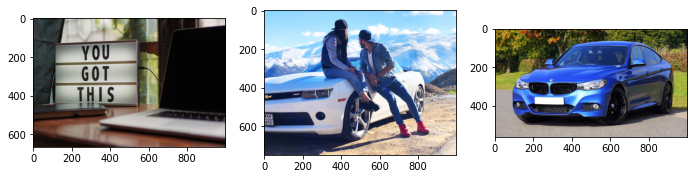

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 
# for i in range()
# img= mpimg.imread("images/pose_estimation.jpg")
# imgplot= plt.imshow(img)
# plt.show()

import glob
images= []
for img_path in glob.glob('images/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [33]:
POSE_IMAGE = cv2.imread("images/pose_estimation.jpg")
TEXT_IMAGE= cv2.imread("images/text_detection.jpg")
CAR_IMAGE = cv2.imread("images/car_type_color.jpg")

In [34]:
global solution 
test_names =["Pose estimation " ,"text detection","Car Colour-Type"]

def test_pose():
    compare = test(pose_estimation, test_names[0], POSE_IMAGE)
    return compare

def test_text():
    compare= test(text_detection, test_names[1], TEXT_IMAGE)
    return compare

def test_car():
    compare= test(car_type_color, test_names[2], CAR_IMAGE)
    return compare

In [38]:
def print_exception(test_name):
    print("Failed to run test on {}.".format(test_name))
    print("Not Successful")
    
def print_test_result(test_name, result):
    if result:
        print("passed {} test.".format(test_name))
    else:
        print("failed {} test, did not obtain expected preprocessed image.".format(test_name))

def test(test_func, test_name, test_image):
    try:
        processed =test_func(test_image)
    except:
        print_exception(test_name)
        return 
    
    sol= solution[test_name](test_image)
    compare =np.array_equal(processed, sol)
    print_test_result(test_name , compare)
    return compare

def set_solution_functions():
    global solution
    solution= {test_names[0]: pose_estimation,test_names[1]: text_detection, test_names[2]: car_type_color}

def feedback(tests_passed):
    print("You passed {} of 3 tests.".format(int(tests_passed)))
    if tests_passed==3:
        print("Successful")
    else:
        print("One or all are unsuccessful")
        

In [36]:
def main_test():
    set_solution_functions()
    counter= test_pose() + test_text() + test_car()
    feedback(counter)
    

In [39]:
main_test()

passed Pose estimation  test.
passed text detection test.
passed Car Colour-Type test.
You passed 3 of 3 tests.
Successful
